## The Great British Baking Show: Predicting Winners
### From season 2 to season 11 ( Series 1 data is deleted as there was no Starbaker system)
#### This is a small data set with 122 rows and it is challenging to build a model out of this but I will try finding the best model.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("baker_results.csv")

In [3]:
df.head()

,series,baker,age,star_baker,technical_winner,technical_top3,technical_highest,technical_lowest,technical_median,series_winner,bread_technical,bread_result,patisserie_technical,patisserie_result
0,2,Ben,31,0,1,3,1,5,2.5,0,3,IN,0,OUT
1,2,Holly,31,2,2,5,1,6,3.0,0,6,IN,1,IN
2,2,Ian,40,0,0,1,2,10,10.0,0,10,OUT,0,OUT
3,2,Janet,63,1,1,1,1,8,5.0,0,8,IN,4,OUT
4,2,Jason,19,2,1,2,1,7,6.0,0,7,IN,0,OUT


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,series,age,star_baker,technical_winner,technical_top3,technical_highest,technical_lowest,technical_median,series_winner,bread_technical,patisserie_technical
count,122.000000,122.00000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,6.508197,37.54918,0.721311,0.803279,2.409836,3.196721,9.081967,5.704918,0.081967,4.877049,0.860656
std,2.886978,13.09413,0.998034,1.001151,2.306133,3.238813,1.939541,2.696611,0.275446,3.467864,1.392516
min,2.000000,17.00000,0.000000,0.000000,0.000000,1.000000,5.000000,1.500000,0.000000,0.000000,0.000000
25%,4.000000,29.00000,0.000000,0.000000,0.000000,1.000000,8.000000,3.500000,0.000000,2.000000,0.000000
50%,6.500000,33.50000,0.000000,1.000000,2.000000,1.000000,9.000000,5.000000,0.000000,5.000000,0.000000
75%,9.000000,45.75000,1.000000,1.000000,4.000000,4.000000,11.000000,7.000000,0.000000,8.000000,1.750000
max,11.000000,71.00000,5.000000,5.000000,8.000000,13.000000,13.000000,13.000000,1.000000,12.000000,5.000000


In [6]:
#Total Number of Participants (Note: Series1 has been scraped due to lack of 'starbaker' system)

df['baker'].count()

122

In [7]:
#Average Number of Participants per series

df['baker'].count()/df['series'].nunique()

12.2

In [8]:
#Number of participants are different per series!
df['series'].value_counts().sort_index(ascending=True)

2     12
3     12
4     13
5     12
6     12
7     12
8     12
9     12
10    13
11    12
Name: series, dtype: int64

Text(0.5, 1.0, 'Bake Off Age Distribution')

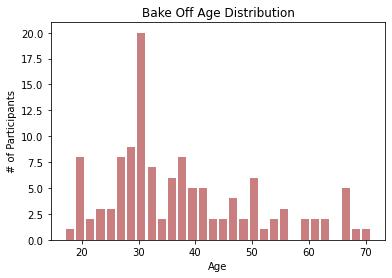

In [9]:
#Let's check the age distribution
import matplotlib.pyplot as plt

plt.hist(x= df.age, bins= 30, alpha=0.6, rwidth=0.8, color='brown')
plt.xlabel('Age')
plt.ylabel('# of Participants')
plt.title('Bake Off Age Distribution')

In [10]:
#Average participant age
df['age'].mean()

37.549180327868854

In [11]:
#Average series winner age
df2 = df[df['series_winner'] == 1]
df2['age'].mean()

33.5

In [12]:
#Most frequent participant's age is 31
df['age'].value_counts(sort = True, ascending = False)

31    12
30     8
37     5
20     5
28     5
66     4
51     4
26     4
27     4
29     4
32     4
40     3
46     3
41     3
19     3
38     3
36     3
33     3
25     3
35     3
56     2
49     2
61     2
63     2
21     2
23     2
50     2
60     2
45     2
43     2
42     2
39     2
34     2
67     1
69     1
17     1
55     1
54     1
53     1
52     1
47     1
24     1
71     1
Name: age, dtype: int64

In [13]:
#Youngest participant?
df.loc[df['age'] == df['age'].min(), 'series':'age']

,series,baker,age
45,5,Martha,17


In [14]:
#Eldest participant?
df.loc[df['age'] == df['age'].max(), 'series':'age']

,series,baker,age
74,8,Flo,71


In [15]:
#Now let's learn more about Starbakers! What percentage of participants won Starbaker at least once?
print(round(len(df.loc[df['star_baker'] != 0, 'baker'].index)/len(df.index)*100,2),'%')

45.08 %


In [16]:
#Who has won Starbaker the most?
df.loc[df['star_baker'] == df['star_baker'].max(), 'series':'star_baker']

,series,baker,age,star_baker
48,5,Richard,38,5


In [17]:
#Did Richard won the series? Unfortunately, no.
df.loc[(df['baker'] == 'Richard') & (df['series'] == 5), ['series','baker', 'star_baker','series_winner']]

,series,baker,star_baker,series_winner
48,5,Richard,5,0


In [18]:
#Was there a series winner who never won Starbaker?
df.loc[(df['star_baker'] == 0) & (df['series_winner'] ==1), ['series','baker','age','star_baker','series_winner']]

,series,baker,age,star_baker,series_winner
100,10,David,36,0,1


In [19]:
#How many starbaker wins did series winner won?
df.loc[df['series_winner'] ==1, ['series','baker','age','star_baker','series_winner']]

,series,baker,age,star_baker,series_winner
5,2,Joanne,41,1,1
16,3,John,23,1,1
28,4,Frances,31,1,1
46,5,Nancy,60,1,1
55,6,Nadiya,30,3,1
63,7,Candice,31,3,1
80,8,Sophie,33,2,1
94,9,Rahul,30,2,1
100,10,David,36,0,1
119,11,Peter,20,2,1


In [20]:
#Now let's check technical bake wins What percentage of participants won the technical at least once?
print(round(len(df.loc[df['technical_winner'] != 0, ].index)/len(df.index)*100,2),'%')

50.82 %


In [21]:
#Who has won technical bakes the most?
df.loc[df['technical_winner'] == df['technical_winner'].max(), ['series','baker','technical_winner']]

,series,baker,technical_winner
15,3,James,5


In [22]:
#Did James won the series? Unfortunately, no.
df.loc[(df['baker'] == 'James') & (df['series'] == 3), ['series','baker', 'star_baker','series_winner']]

,series,baker,star_baker,series_winner
15,3,James,3,0


In [23]:
#How many technical wins did series winner won?
df.loc[df['series_winner'] ==1, ['series','baker','age','technical_winner','series_winner']]

,series,baker,age,technical_winner,series_winner
5,2,Joanne,41,3,1
16,3,John,23,1,1
28,4,Frances,31,1,1
46,5,Nancy,60,3,1
55,6,Nadiya,30,4,1
63,7,Candice,31,1,1
80,8,Sophie,33,2,1
94,9,Rahul,30,1,1
100,10,David,36,2,1
119,11,Peter,20,3,1


In [24]:
#What was the lowest technical ranks of series winners?
df.loc[df['series_winner'] ==1, ['series','baker','age','technical_lowest','series_winner']]

,series,baker,age,technical_lowest,series_winner
5,2,Joanne,41,11,1
16,3,John,23,11,1
28,4,Frances,31,8,1
46,5,Nancy,60,5,1
55,6,Nadiya,30,12,1
63,7,Candice,31,8,1
80,8,Sophie,33,6,1
94,9,Rahul,30,7,1
100,10,David,36,10,1
119,11,Peter,20,10,1


In [25]:
#Well it seems like there were ups and downs in terms of technical baking for series winners.
#How about the median? 
df.loc[df['series_winner'] ==1, ['series','baker','age','technical_median','series_winner']]

,series,baker,age,technical_median,series_winner
5,2,Joanne,41,4.5,1
16,3,John,23,3.0,1
28,4,Frances,31,3.0,1
46,5,Nancy,60,2.5,1
55,6,Nadiya,30,4.0,1
63,7,Candice,31,2.5,1
80,8,Sophie,33,2.5,1
94,9,Rahul,30,3.5,1
100,10,David,36,2.0,1
119,11,Peter,20,2.0,1


In [26]:
#Paul Hollywood mentioned that bread week is critical.
#How did the series winners performed in bread week?
df.loc[(df['series_winner'] == 1), ['series','baker','age','bread_result','bread_technical']]

,series,baker,age,bread_result,bread_technical
5,2,Joanne,41,IN,1
16,3,John,23,STARBAKER,1
28,4,Frances,31,IN,2
46,5,Nancy,60,IN,5
55,6,Nadiya,30,IN,9
63,7,Candice,31,IN,3
80,8,Sophie,33,IN,6
94,9,Rahul,30,STARBAKER,4
100,10,David,36,IN,2
119,11,Peter,20,IN,4


In [27]:
#Youngest winner
df2.loc[df2['age'] == df2['age'].min(), ['series','baker','age']]

,series,baker,age
119,11,Peter,20


In [28]:
#Eldest winner
df2.loc[df2['age'] == df2['age'].max(), ['series','baker','age']]

,series,baker,age
46,5,Nancy,60


### Preparing the data set for building models

In [29]:
df.drop(['series','baker'], axis=1, inplace=True)

In [30]:
df = pd.get_dummies(df, columns = ['bread_result'], prefix='bread_result')
df = pd.get_dummies(df, columns = ['patisserie_result'], prefix='patisserie_result')

In [31]:
df.describe()

,age,star_baker,technical_winner,technical_top3,technical_highest,technical_lowest,technical_median,series_winner,bread_technical,patisserie_technical,bread_result_IN,bread_result_OUT,bread_result_STARBAKER,patisserie_result_IN,patisserie_result_OUT,patisserie_result_STARBAKER
count,122.00000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,37.54918,0.721311,0.803279,2.409836,3.196721,9.081967,5.704918,0.081967,4.877049,0.860656,0.688525,0.229508,0.081967,0.213115,0.745902,0.040984
std,13.09413,0.998034,1.001151,2.306133,3.238813,1.939541,2.696611,0.275446,3.467864,1.392516,0.465006,0.422251,0.275446,0.411197,0.437148,0.199070
min,17.00000,0.000000,0.000000,0.000000,1.000000,5.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.00000,0.000000,0.000000,0.000000,1.000000,8.000000,3.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
50%,33.50000,0.000000,1.000000,2.000000,1.000000,9.000000,5.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,45.75000,1.000000,1.000000,4.000000,4.000000,11.000000,7.000000,0.000000,8.000000,1.750000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,71.00000,5.000000,5.000000,8.000000,13.000000,13.000000,13.000000,1.000000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

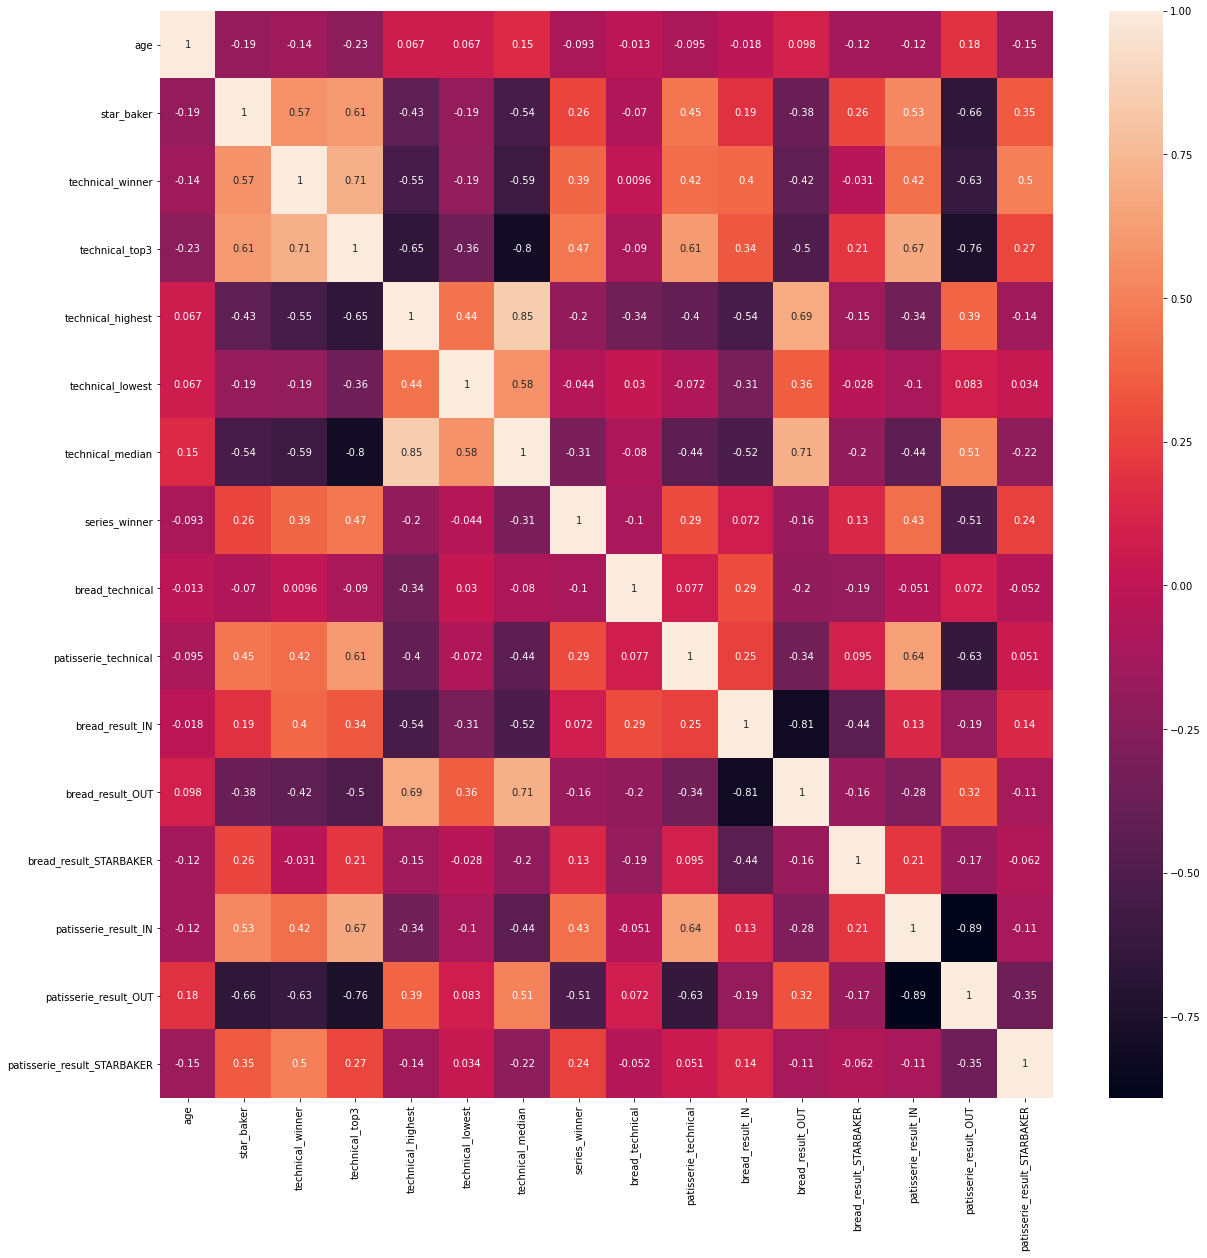

In [33]:
#Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) 
                          for i in range(len(df.columns))] 
  
print(vif_data)

                        feature       VIF
0                           age  1.128633
1                    star_baker  2.242875
2              technical_winner  3.072024
3                technical_top3  6.937010
4             technical_highest  5.531516
5              technical_lowest  1.824702
6              technical_median  8.824887
7                 series_winner  1.465619
8               bread_technical  1.651937
9          patisserie_technical  2.054302
10              bread_result_IN       inf
11             bread_result_OUT       inf
12       bread_result_STARBAKER       inf
13         patisserie_result_IN       inf
14        patisserie_result_OUT       inf
15  patisserie_result_STARBAKER       inf


/Users/monica/miniforge3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
target = df[['series_winner']]

In [36]:
#Selecting the variables(but dropping features with VIF larger than 5)
df_vars = df.drop(['series_winner','technical_top3','technical_median','technical_highest'], axis=1)

In [37]:
##scaler = StandardScaler()
##df_vars[df_vars.columns] = scaler.fit_transform(df_vars[df_vars.columns])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_vars, 
                                                    target, 
                                                    test_size= 0.2,
                                                    stratify = target,
                                                    random_state= 7)

In [39]:
clf = LogisticRegressionCV(solver ='lbfgs', penalty='l2', n_jobs=-1, random_state=5,
                           max_iter=10000, cv = 5, class_weight='balanced', Cs = [0.0001, 0.001,0.01,0.05,0.1,1,10,15,20,30,40,50])
clf_model = clf.fit(x_train, y_train)
scores = clf_model.C_

scores

/Users/monica/miniforge3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([10.])

In [40]:
clf_model = LogisticRegressionCV(n_jobs=-1, random_state=7, max_iter=10000, cv=5, class_weight='balanced', penalty='l2',
                                 solver='lbfgs',Cs=[110]).fit(x_train,y_train)
y_pred=clf_model.predict(x_test)

/Users/monica/miniforge3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18,  5],
       [ 1,  1]])

Text(0.5, 257.44, 'Predicted label')

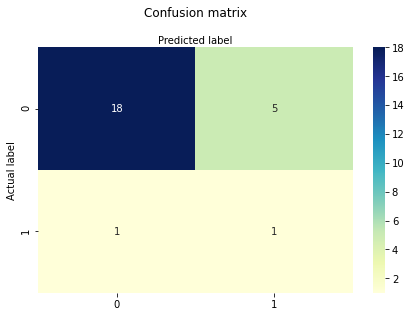

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.76
Precision: 0.16666666666666666
Recall: 0.5


In [44]:
x_train_probs = clf_model.predict_proba(x_train)
x_test_probs = clf_model.predict_proba(x_test)
print(x_train_probs.shape, x_train_probs.shape)

(97, 2) (97, 2)


In [45]:
x_train_probs_df = pd.DataFrame(x_train_probs)
x_train_probs_df.columns = ['trainprobs' + str(col) for col in x_train_probs_df.columns]
x_train_probs_df.head()

,trainprobs0,trainprobs1
0,0.999974,2.562131e-05
1,0.999945,5.464976e-05
2,0.999845,1.551288e-04
3,0.999999,7.213017e-07
4,0.001953,9.980471e-01


In [46]:
x_test_probs_df = pd.DataFrame(x_test_probs)
x_test_probs_df.columns = ['testprobs' + str(col) for col in x_test_probs_df.columns]
x_test_probs_df.head()

,testprobs0,testprobs1
0,0.999190,8.100643e-04
1,0.999985,1.458516e-05
2,0.999999,8.496019e-07
3,0.000073,9.999269e-01
4,0.999996,4.227888e-06


In [47]:
x_train['predictions_1'] = x_train_probs[:,-1]
x_train.head()

<ipython-input-47-10d6d9505baf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['predictions_1'] = x_train_probs[:,-1]


,age,star_baker,technical_winner,technical_lowest,bread_technical,patisserie_technical,bread_result_IN,bread_result_OUT,bread_result_STARBAKER,patisserie_result_IN,patisserie_result_OUT,patisserie_result_STARBAKER,predictions_1
21,28,0,1,10,10,0,1,0,0,0,1,0,2.562131e-05
65,37,0,1,8,8,0,1,0,0,0,1,0,5.464976e-05
13,27,0,1,8,8,0,1,0,0,0,1,0,1.551288e-04
56,49,0,1,10,10,5,1,0,0,0,1,0,7.213017e-07
31,30,2,3,10,1,1,1,0,0,0,0,1,9.980471e-01


In [48]:
x_test['predictions_1'] = x_test_probs[:,1]
x_test.head()

<ipython-input-48-603a9ad8f0eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['predictions_1'] = x_test_probs[:,1]


,age,star_baker,technical_winner,technical_lowest,bread_technical,patisserie_technical,bread_result_IN,bread_result_OUT,bread_result_STARBAKER,patisserie_result_IN,patisserie_result_OUT,patisserie_result_STARBAKER,predictions_1
8,25,0,0,7,4,0,1,0,0,0,1,0,8.100643e-04
101,40,0,1,12,8,0,1,0,0,0,1,0,1.458516e-05
42,32,0,0,12,10,0,0,1,0,0,1,0,8.496019e-07
15,21,3,5,7,2,1,1,0,0,0,0,1,9.999269e-01
90,60,0,0,11,5,0,1,0,0,0,1,0,4.227888e-06


In [49]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train['predictions_1'])
metrics.auc(fpr, tpr)

0.973314606741573

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test['predictions_1'])
metrics.auc(fpr, tpr)

0.8043478260869564

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(20,20)})

In [52]:
y_pred_prob_train = x_train['predictions_1']

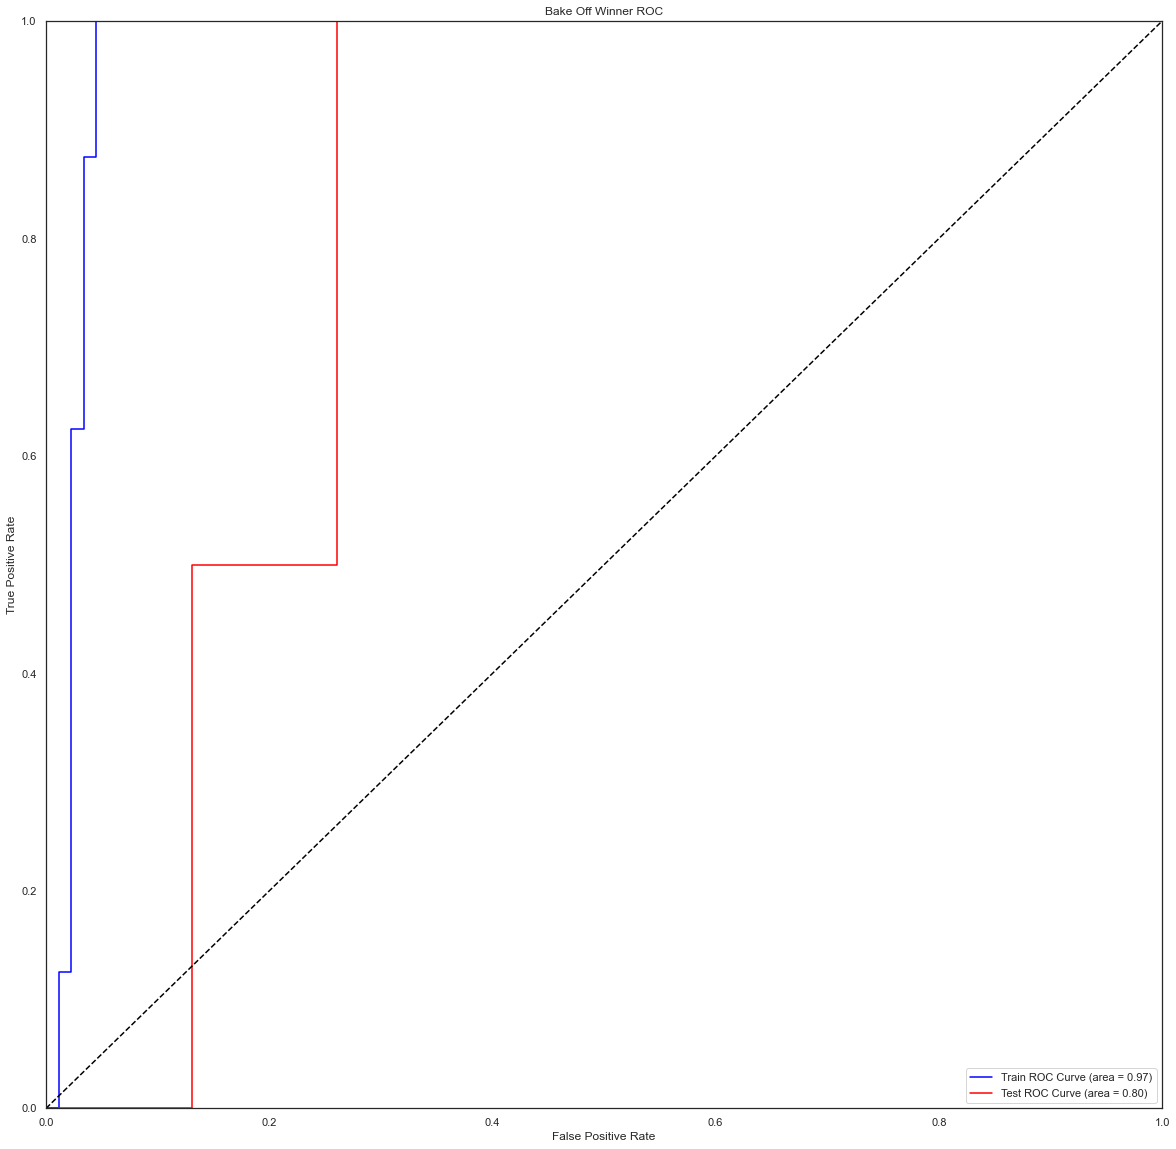

In [53]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, x_train['predictions_1'])[0], roc_curve(y_train, x_train['predictions_1'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, x_train['predictions_1']))

plt.plot(roc_curve(y_test, x_test['predictions_1'])[0],roc_curve(y_test, x_test['predictions_1'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test['predictions_1']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bake Off Winner ROC')
plt.legend()
plt.show()

Despite tuning, logistic regression model is overfitting and the ROC curves don't look right. I will try different models.

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [55]:
random_grid = {'criterion' : ['entropy', 'gini'],
               'n_estimators': [5,10,15,20,30,40,50,100],
               'max_features': ['auto', 'sqrt', 'log2', None],
               'max_depth': [1,2,5,10,15],
               'min_samples_split': [2,3,4,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True, False],
               'class_weight': ['balanced', 'balanced_subsample', None]
              }

rf_clf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)



In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [57]:
rf_clf_model = rf_random.fit(x_train, y_train)

/Users/monica/miniforge3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [58]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': None,
 'bootstrap': True}

In [59]:
rf_train_probs = rf_clf_model.predict_proba(x_train)
rf_test_probs = rf_clf_model.predict_proba(x_test)

In [60]:
rf_train_prob_cols = ['class', 'proba']

In [61]:
rf_preds_train = pd.DataFrame(rf_train_probs, columns=rf_train_prob_cols)
rf_preds_test = pd.DataFrame(rf_test_probs, columns=rf_train_prob_cols)

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_preds_train['proba'])
metrics.auc(fpr, tpr)

1.0

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_preds_test['proba'])
metrics.auc(fpr, tpr)

0.8560606060606061

Test AUC improved but Random Forest model is overfitting as well.

### Naive Bayes (Gaussian)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [65]:
sum(df['series_winner'])/len(df['series_winner'])

0.08196721311475409

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB(priors=[0.082, 0.918])

In [67]:
# Train model
gnb_model = gnb_clf.fit(x_train, y_train)

/Users/monica/miniforge3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [68]:
# Predict class
train_probs = gnb_model.predict_proba(x_train)
test_probs = gnb_model.predict_proba(x_test)

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_probs[:,1])
metrics.auc(fpr, tpr)

0.9365079365079365

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_probs[:,1])
metrics.auc(fpr, tpr)

0.8636363636363636

Gaussian Naive Bayes is overfitting as well but not as much as Random Forest or Logistic Regression

### Naive Bayes (Bernoulli)

In [71]:
df_vars_nb = pd.get_dummies(data=df_vars, columns=['age','star_baker','technical_winner','technical_lowest','bread_technical','patisserie_technical'])

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_vars_nb, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [73]:
from sklearn.naive_bayes import BernoulliNB
nb_bourn_clf = BernoulliNB(class_prior=[0.082, 0.918])

In [74]:
#Training the model
nb_bourn_model = nb_bourn_clf.fit(x_train, y_train.values.ravel())

In [75]:
#Predicting the class
train_probs = nb_bourn_model.predict_proba(x_train)
test_probs = nb_bourn_model.predict_proba(x_test)

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_probs[:,1])
metrics.auc(fpr, tpr)

0.9603174603174603

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_probs[:,1])
metrics.auc(fpr, tpr)

0.9090909090909091

BernoulliNB is still overfitting but the difference between Train AUC and Test AUC is the smallest. I will try tuning the model.

In [119]:
nb_bourn_clf = BernoulliNB(class_prior=[0.082, 0.918], alpha=4)

In [120]:
#Training the model
nb_bourn_model = nb_bourn_clf.fit(x_train, y_train.values.ravel())

In [121]:
#Predicting the class
train_probs = nb_bourn_model.predict_proba(x_train)
test_probs = nb_bourn_model.predict_proba(x_test)

In [122]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_probs[:,1])
metrics.auc(fpr, tpr)

0.9428571428571428

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_probs[:,1])
metrics.auc(fpr, tpr)

0.9393939393939393

After tuning the alpha parameter, the Test AUC improved and the overfitting problem is solved.

### XGBoost
This may be an overkill but would like to try it to see if it can perform better than BernoulliNB. <br>
I am using M1 Macbook Pro and installing these packages has been a pain... I am stuck with figuring out installing XGBoost so I will come back once I figure this out.